# LAB | Cleaning Numerical Data

##### Business objectives: 
- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.
- Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

##### Remember the process:

- **Case Study**
- **Get data**
- **Cleaning/Wrangling/EDA**
- Processing Data
- Modeling
 -Validation
- Reporting

*** 

1. Import necessary libraries.

In [87]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

import re


2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [3]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

3. First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
customer_df['Total Claim Amount'].value_counts()

316.800000    116
292.800000    110
312.000000    108
350.400000    105
331.200000    102
             ... 
377.442796      1
20.985105       1
280.897050      1
268.130863      1
790.784983      1
Name: Total Claim Amount, Length: 5106, dtype: int64

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [8]:
customer_df.columns = customer_df.columns.str.lower().str.replace(' ','_')
customer_df = customer_df.rename(columns={'employmentstatus' : 'employment_status'})
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


5. Change effective to date column to datetime format.

In [9]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], infer_datetime_format=True)
customer_df.effective_to_date

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

6. Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [10]:
numerical_df = customer_df.select_dtypes(np.number)
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [11]:
numerical_df.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

There's a gap between `number_of_open_complaints` + `number_of_policies` and the rest of the columns, so these would be our chosen discrete variables.

In [12]:
def continuous_vs_discrete(df):
    continuous = []
    discrete = []
    
    for column in df.columns:
        if df[column].nunique() > 10:
            continuous.append(column)
        else:
            discrete.append(column)
            
    return continuous, discrete

In [13]:
continuous_list, discrete_list = continuous_vs_discrete(numerical_df)

In [14]:
discrete_list

['number_of_open_complaints', 'number_of_policies']

In [15]:
continuous_list

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'total_claim_amount']

8. Plot a correlation matrix, comment what you see.

In [16]:
correlations_matrix = numerical_df.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


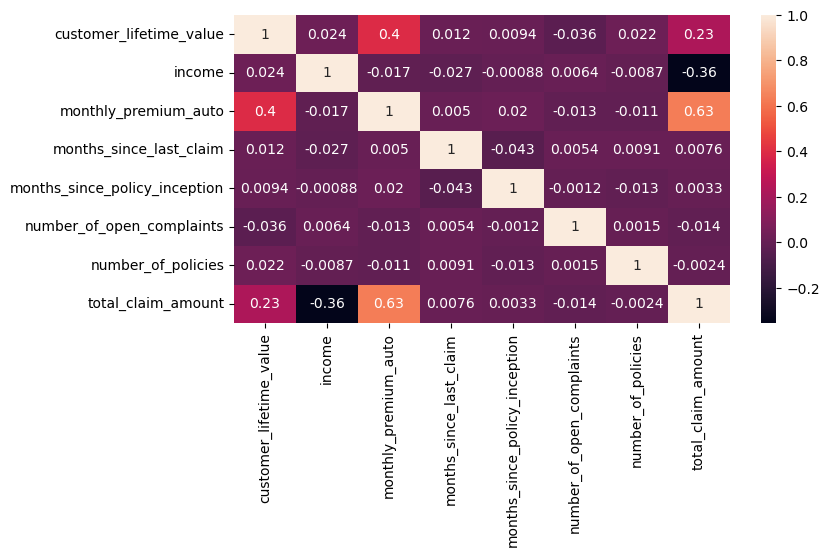

In [17]:
plt.figure(figsize=(8, 4)) # for better reading
sns.heatmap(correlations_matrix, annot=True)
plt.show()

9. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

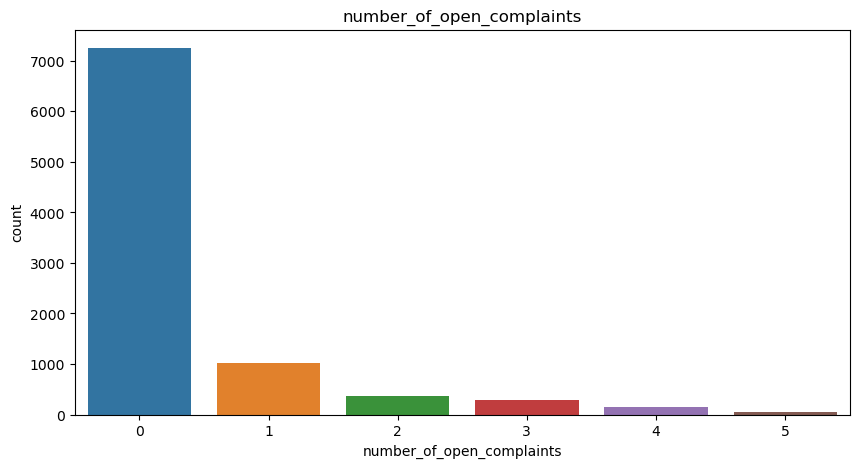

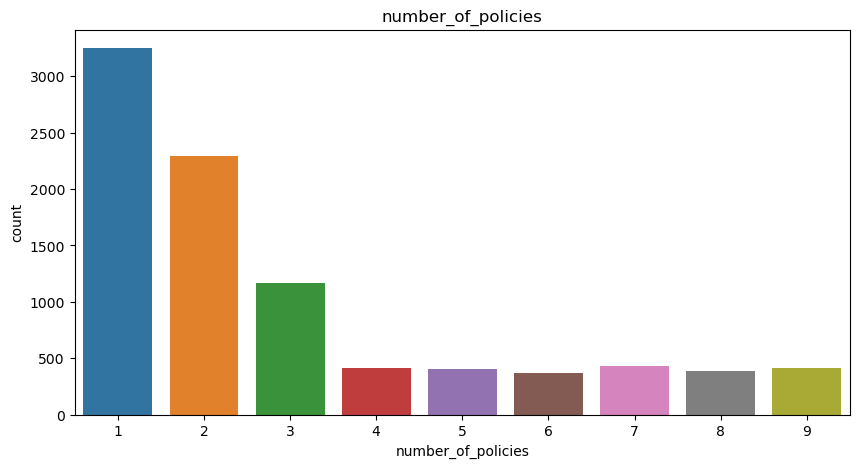

In [18]:
def plot_discrete(df, cols):
    for col in cols:
        plt.figure(figsize=(10,5))
        sns.countplot(df, x=col)
        plt.title(col)
        plt.show()

plot_discrete(numerical_df, discrete_list)

<Figure size 1000x500 with 0 Axes>

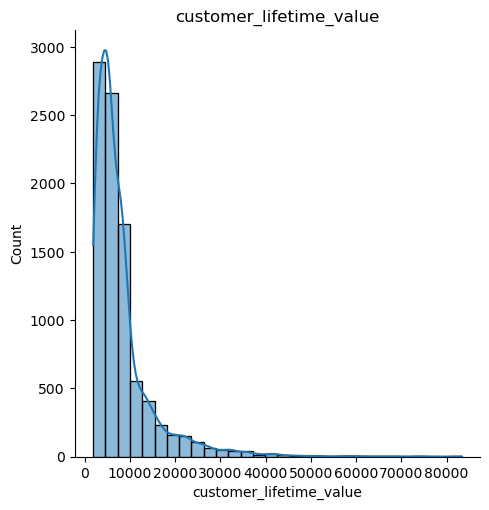

<Figure size 1000x500 with 0 Axes>

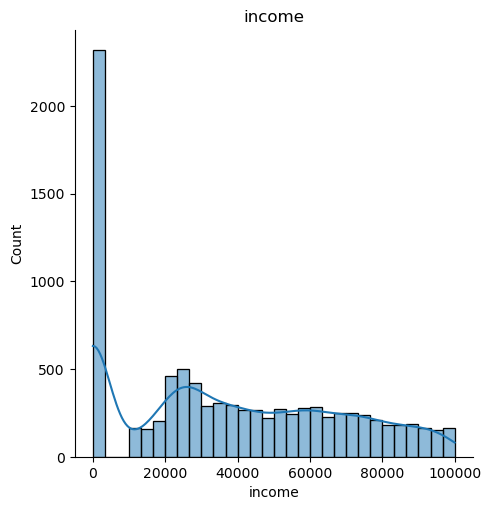

<Figure size 1000x500 with 0 Axes>

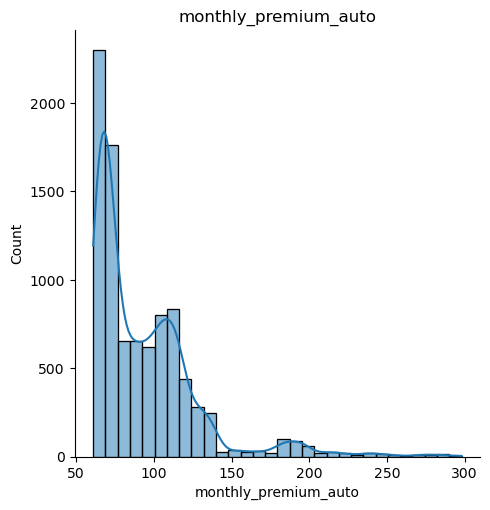

<Figure size 1000x500 with 0 Axes>

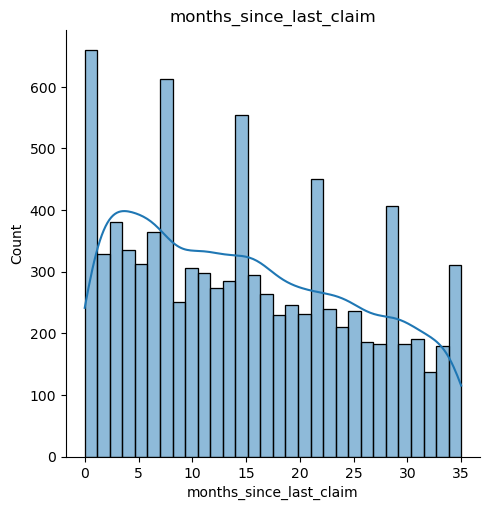

<Figure size 1000x500 with 0 Axes>

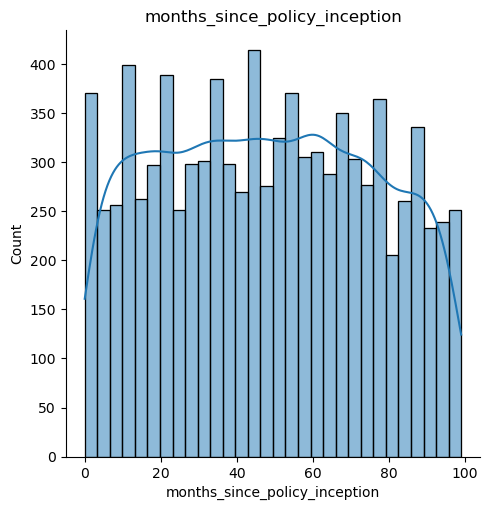

<Figure size 1000x500 with 0 Axes>

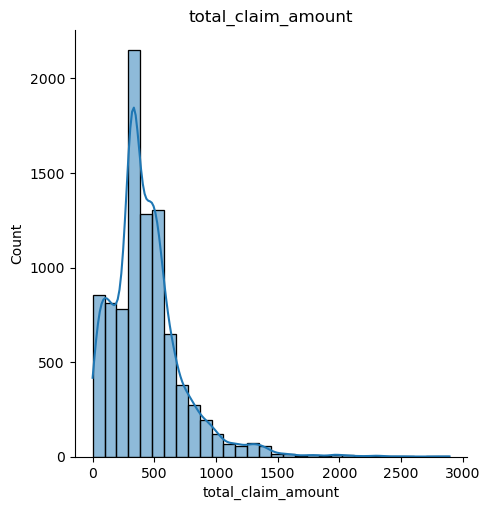

In [19]:
def plot_continuous(df, cols):
    for col in cols:
        plt.figure(figsize=(10,5))
        sns.displot(df, x=col, kde=True, bins=30)
        plt.title(col)
        plt.show()

plot_continuous(numerical_df, continuous_list)

In [20]:
## alt way from customer_analysis
# def plot_dfs(df):
#     for col in df.columns:
#         sns.displot(df[col], kde=True)
#         plt.title(col)
#         plt.show()

# plot_dfs(numerical_df)

10. Comment what you can see in the plots.

**Comments:**
- **Discrete:**
    - `number_of_open_complaints`: most users don't have any complaints recorded.
    - `number_of_policies`: most users stick to 1 policy.
- **Continuous:**
    - `customer_lifetime_value`: it shows a right-skewed distribution, peaking in numbers under 1000.
    - `income`: there is a big spike at 0, meaning that there is a great amount of people witth zero income, hinting at unemployment; it could also be error in input. 
    - `monthly_premium_auto`: it shows a right-skewed distribution, peaking in numbers between 50 and 150, meaning most users pay monthly sum under 150.
    - `months_since_last_claim`: barplot is hard to read, might need changing from continuous to discrete variable. Initial assessment seems to show the biggest amount of complaints done between 0-5 months.
    - `months_since_policy_inception`: no big skewes.
    - `total_claim_amount`: target plot, showing a right-skewed distribution. Shows that most claims are under 500.

11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

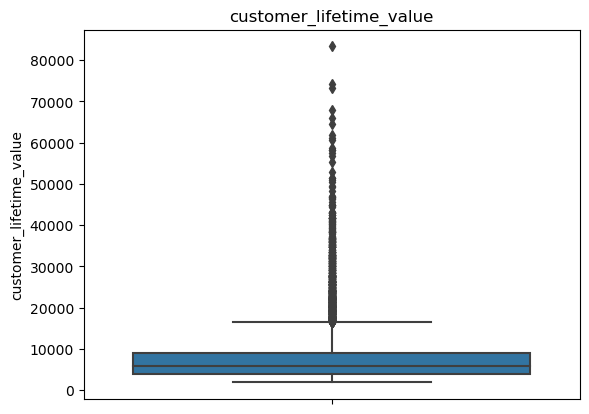

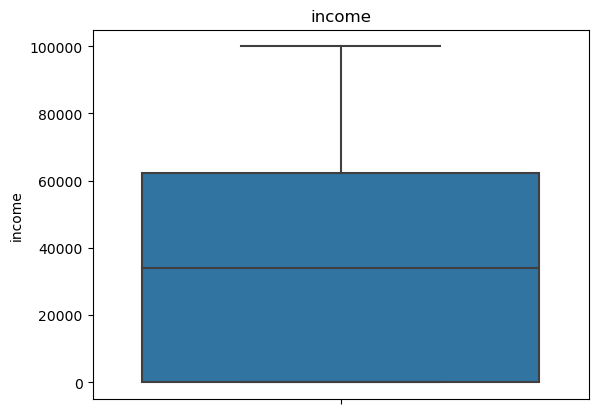

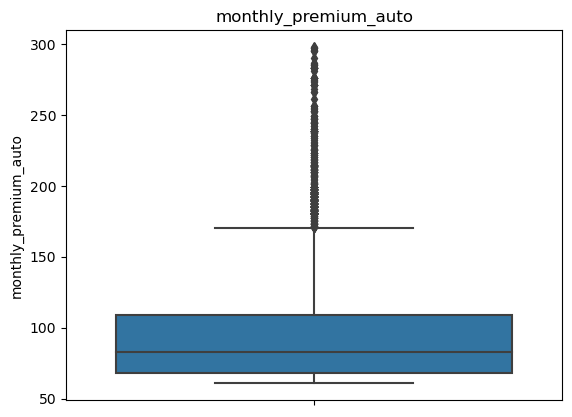

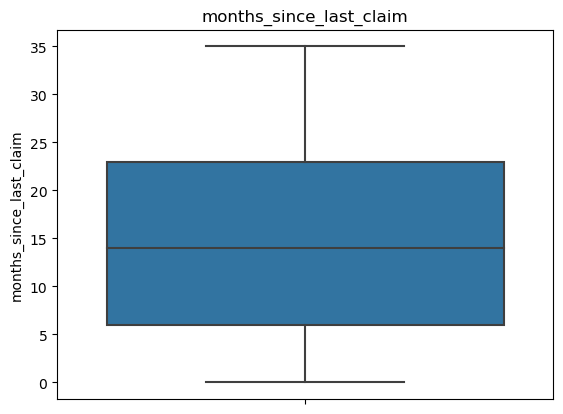

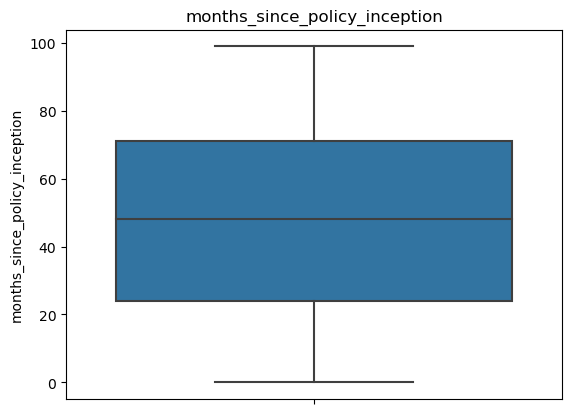

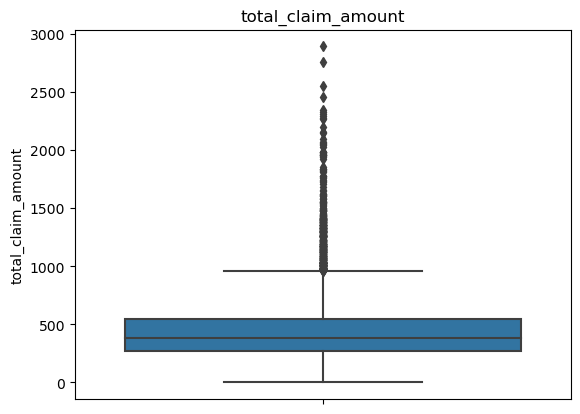

In [21]:
def outliers_check(df, cols):
    for col in cols:
        sns.boxplot(df, y=col)
        plt.title(col)
        plt.show()

outliers_check(numerical_df, continuous_list)

12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

- We see potential outliers in `customer_lifetime_value`, `monthly_premium_auto`, and `total_claim_amount`. But as it is a large quantity, and could deal with key population as top donors, we are not touching the dataset for now.

13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [22]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [23]:
# numerical_df.to_csv('numerical.csv')

***

# LAB | Cleaning categorical data

2. Find  all of the categorical data.  Save it in a categorical_df variable.


In [24]:
categorical_df = customer_df.select_dtypes(object)
categorical_df.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


3. Check for NaN values and decide what to do with them, do it now.

In [25]:
categorical_df.isna().sum()

customer             0
state                0
response             0
coverage             0
education            0
employment_status    0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

4. Check all unique values of columns.


In [26]:
categorical_df.nunique()

customer             9134
state                   5
response                2
coverage                3
education               5
employment_status       5
gender                  2
location_code           3
marital_status          3
policy_type             3
policy                  9
renew_offer_type        4
sales_channel           4
vehicle_class           6
vehicle_size            3
dtype: int64

In [27]:
def check_vals(df):
    for col in df.columns:
        print(col,':',list(df[col].unique()))

check_vals(categorical_df.loc[:, categorical_df.columns != 'customer']) 
# we use the .loc to get all cols but customer, as all its' values are unique 


state : ['Washington', 'Arizona', 'Nevada', 'California', 'Oregon']
response : ['No', 'Yes']
coverage : ['Basic', 'Extended', 'Premium']
education : ['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor']
employment_status : ['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired']
gender : ['F', 'M']
location_code : ['Suburban', 'Rural', 'Urban']
marital_status : ['Married', 'Single', 'Divorced']
policy_type : ['Corporate Auto', 'Personal Auto', 'Special Auto']
policy : ['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1', 'Special L2', 'Corporate L1', 'Personal L2', 'Special L1', 'Special L3']
renew_offer_type : ['Offer1', 'Offer3', 'Offer2', 'Offer4']
sales_channel : ['Agent', 'Call Center', 'Web', 'Branch']
vehicle_class : ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car', 'Luxury Car']
vehicle_size : ['Medsize', 'Small', 'Large']


5. Check dtypes. Do they all make sense as categorical data?


In [28]:
categorical_df.dtypes

customer             object
state                object
response             object
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

6. Does any column contain alpha and numeric data?  Decide how to clean it and do it now.


In [29]:
categorical_df.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


We have 3 alphanumerical variables:
- `customer`: unique key value for each customer, we do not touch it.
- `policy_type`: has same level format ('L1, L2...') but different types ('Personal, Corporate...'); could be split into two columns.
- `renew_offer_type`: number is the only necessary part of value.

In [30]:
# split policy into two cols
categorical_df[['policy_type', 'policy_lvl']] = categorical_df['policy'].str.split(' ', 1, expand=True)
categorical_df['policy_lvl'] = categorical_df['policy_lvl'].str.extract('(\d+)', expand=False)


/var/folders/nn/t4c1n2z11_g_hd91q77nxzb80000gn/T/ipykernel_77053/2732867677.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  categorical_df[['policy_type', 'policy_lvl']] = categorical_df['policy'].str.split(' ', 1, expand=True)


In [31]:
# drop og policy column
categorical_df.drop(columns='policy', inplace = True)
categorical_df

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,policy_lvl
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate,Offer1,Agent,Two-Door Car,Medsize,3
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal,Offer3,Agent,Four-Door Car,Medsize,3
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal,Offer1,Agent,Two-Door Car,Medsize,3
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate,Offer1,Call Center,SUV,Medsize,2
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal,Offer1,Agent,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal,Offer2,Web,Four-Door Car,Medsize,1
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate,Offer1,Branch,Four-Door Car,Medsize,3
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate,Offer1,Branch,Four-Door Car,Medsize,2
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal,Offer3,Branch,Four-Door Car,Large,2


In [32]:
# keep number of renew_offer_type
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].str.extract('(\d+)', expand=False)
categorical_df

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,policy_lvl
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate,1,Agent,Two-Door Car,Medsize,3
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal,3,Agent,Four-Door Car,Medsize,3
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal,1,Agent,Two-Door Car,Medsize,3
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate,1,Call Center,SUV,Medsize,2
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal,1,Agent,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal,2,Web,Four-Door Car,Medsize,1
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate,1,Branch,Four-Door Car,Medsize,3
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate,1,Branch,Four-Door Car,Medsize,2
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal,3,Branch,Four-Door Car,Large,2


In [44]:
# set cols alphabetically to have policy ones side by side
categorical_df.sort_index(axis=1, inplace=True)
categorical_df.drop(['customer'], axis=1, inplace=True)

# reorder cols 
cols_to_move = ['state', 'response']
categorical_df = categorical_df[ cols_to_move + [ col for col in categorical_df.columns if col not in cols_to_move ] ]
categorical_df


,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_lvl,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,3,Corporate,1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,3,Personal,3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,3,Personal,1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,2,Corporate,1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,1,Personal,1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,1,Personal,2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,3,Corporate,1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,2,Corporate,1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,2,Personal,3,Branch,Four-Door Car,Large


7. Would you choose to do anything else to clean or wrangle the categorical data?  Comment your decisions and do it now.


None for now. 

8. Compare policy_type and policy.  What information is contained in these columns.  Can you identify what is important?  


These columns have already been dealt with, now seen above as `policy_type` and `policy_lvl`, splitting the values of `policy` into two.

9. Check number of unique values in each column, can they be combined in any way to ease encoding?  Comment your thoughts and make those changes.


In [45]:
categorical_df.nunique()

state                5
response             2
coverage             3
education            5
employment_status    5
gender               2
location_code        3
marital_status       3
policy_lvl           3
policy_type          3
renew_offer_type     4
sales_channel        4
vehicle_class        6
vehicle_size         3
dtype: int64

**Thoughts:**
- `state` and `location_code` at first glance could be a reasonable merge, but that would mean that each state would have their subcategory of location and make more columns.
- `vehicle_class` and `vehicle_size` as well, but a deeper analysis shows that each class can have different types, and would not ease encoding in the way we're looking.
- the rest of the variables don't have too much correlation initially to merge.

10.  Save the cleaned catagorical dataframe as categorical.csv   You will use this file again this week.

In [35]:
categorical_df.to_csv('categorical.csv', index=False)

***

# LAB | Feature Extraction

1. Open the `categorical` dataframe we created before.

In [46]:
categorical_df

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_lvl,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,3,Corporate,1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,3,Personal,3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,3,Personal,1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,2,Corporate,1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,1,Personal,1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,1,Personal,2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,3,Corporate,1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,2,Corporate,1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,2,Personal,3,Branch,Four-Door Car,Large


2. Plot all the categorical variables with the proper plot. What can you see?

<Figure size 1000x800 with 0 Axes>

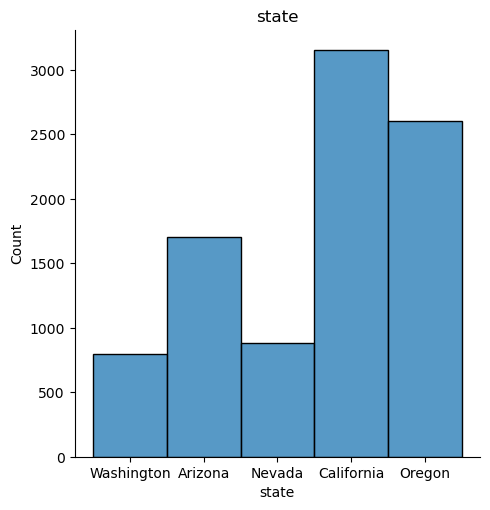

<Figure size 1000x800 with 0 Axes>

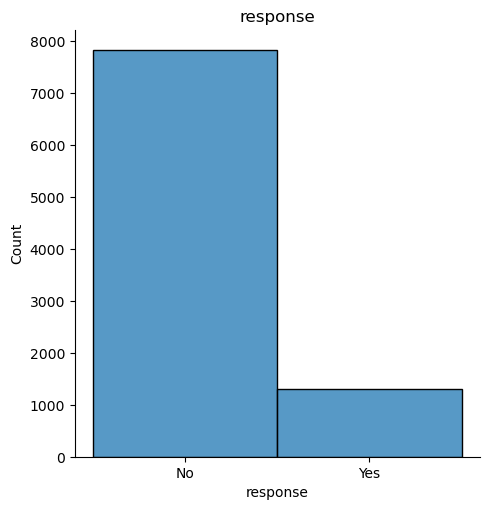

<Figure size 1000x800 with 0 Axes>

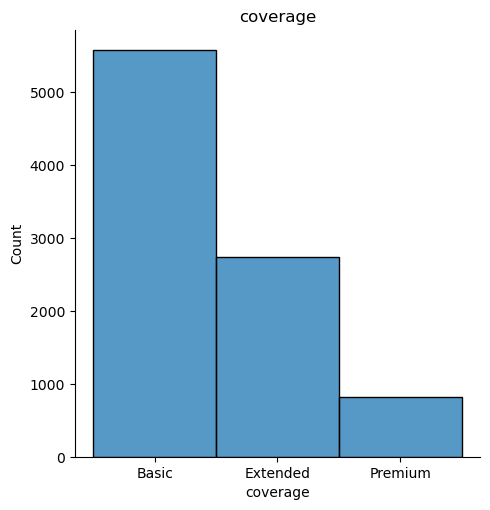

<Figure size 1000x800 with 0 Axes>

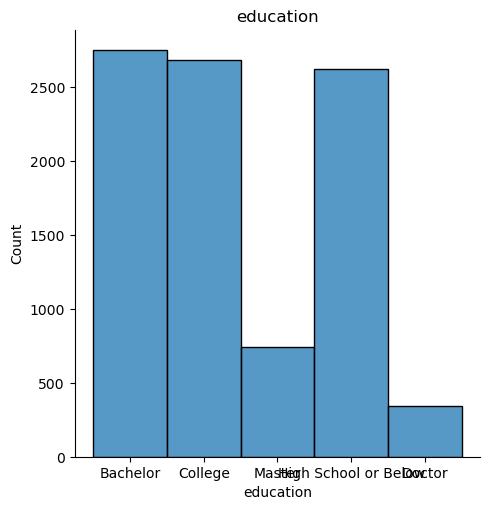

<Figure size 1000x800 with 0 Axes>

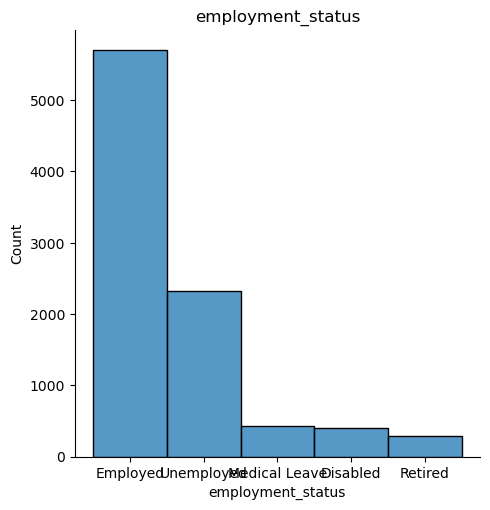

<Figure size 1000x800 with 0 Axes>

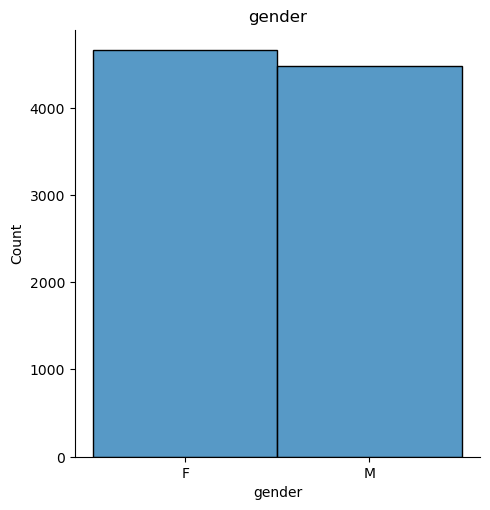

<Figure size 1000x800 with 0 Axes>

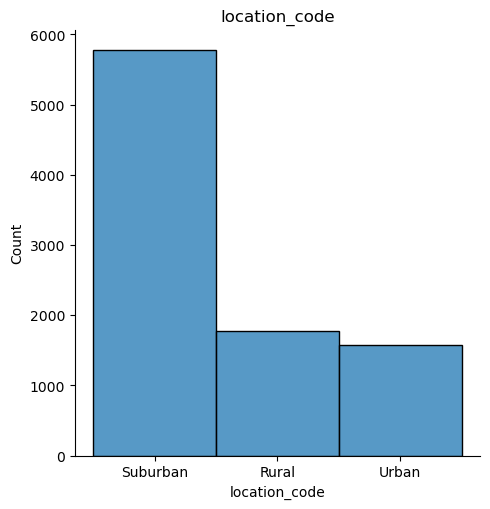

<Figure size 1000x800 with 0 Axes>

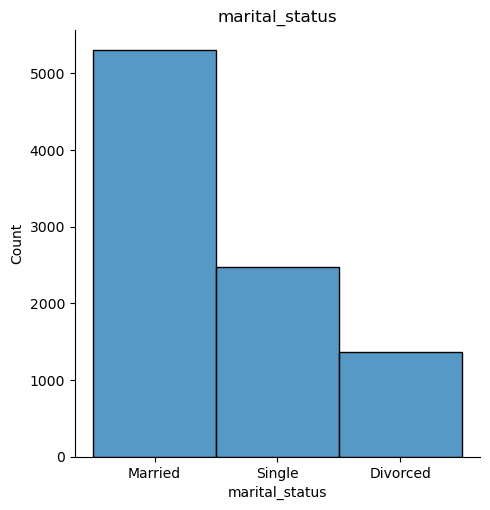

<Figure size 1000x800 with 0 Axes>

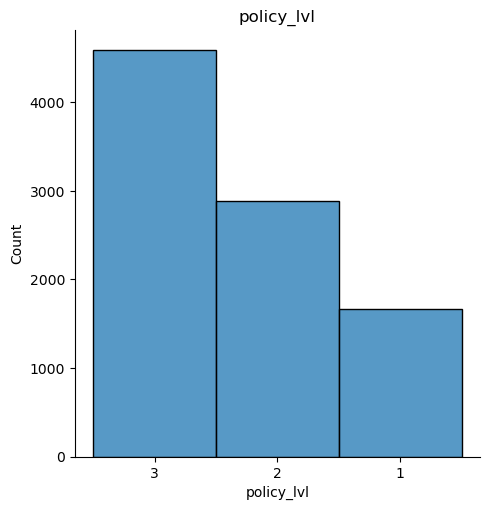

<Figure size 1000x800 with 0 Axes>

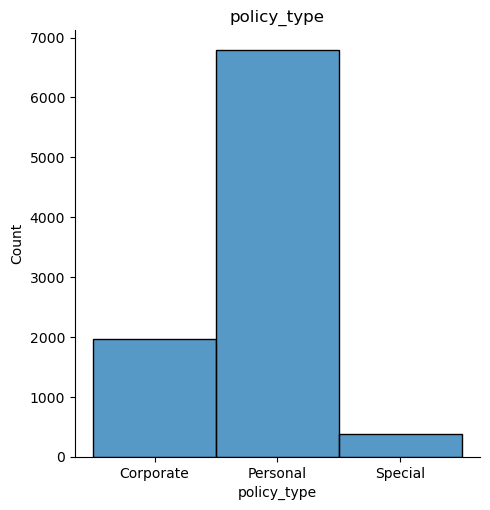

<Figure size 1000x800 with 0 Axes>

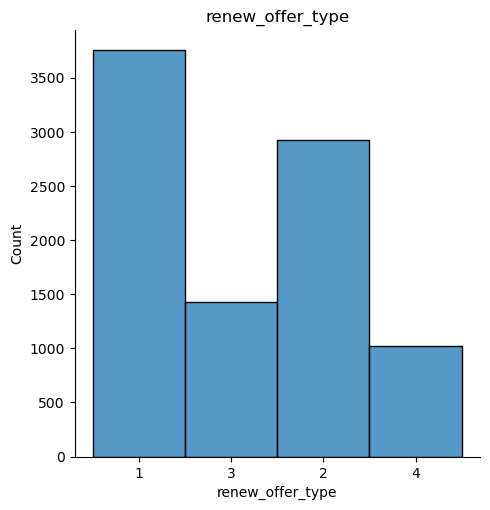

<Figure size 1000x800 with 0 Axes>

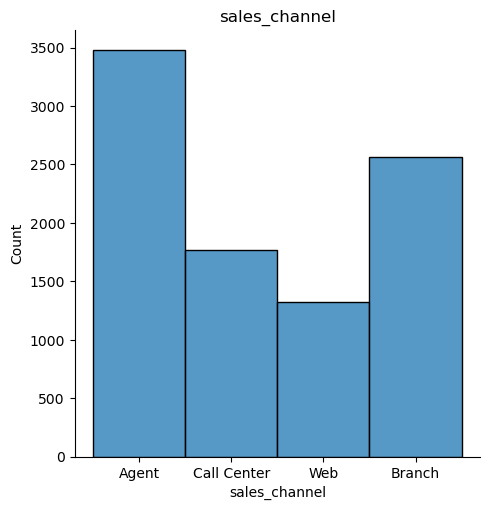

<Figure size 1000x800 with 0 Axes>

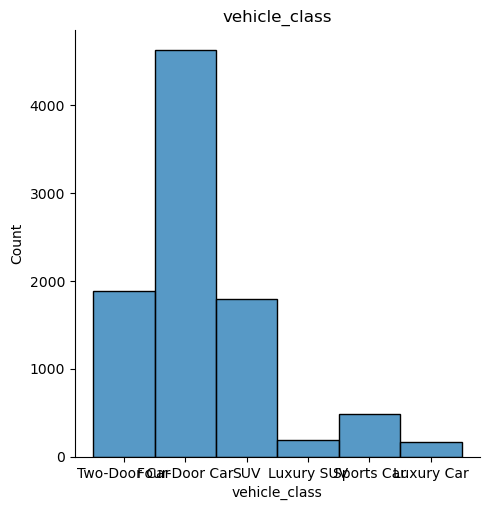

<Figure size 1000x800 with 0 Axes>

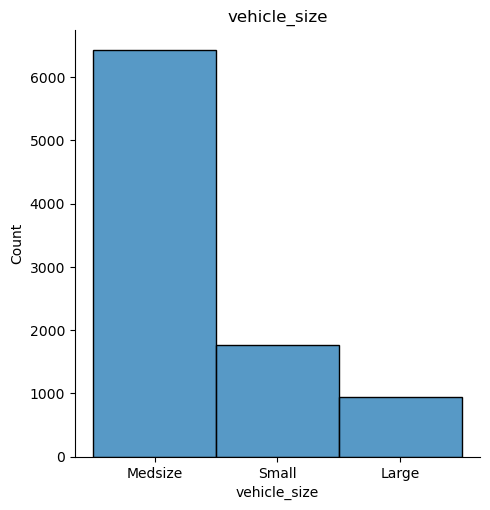

In [50]:
def plot_dfs(df):
    for col in df.columns:
        plt.figure(figsize=(10,8))
        sns.displot(df[col])
        plt.title(col)
        plt.show()

plot_dfs(categorical_df)

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?  
    Make any changes you feel are necessary.

In [51]:
# our null hypothesis is always that they're independent
cat_crosstab = pd.crosstab(categorical_df['state'], categorical_df['location_code'], margins=False)
cat_crosstab

location_code,Rural,Suburban,Urban
state,,,
Arizona,325,1080,298
California,604,1997,549
Nevada,180,550,152
Oregon,513,1640,448
Washington,151,512,135


In [53]:
import scipy.stats as st
st.chi2_contingency(cat_crosstab)[1]
# they are independent


0.9960201469631593

In [54]:
cat_crosstab = pd.crosstab(categorical_df['education'], categorical_df['employment_status'], margins=False)
cat_crosstab

employment_status,Disabled,Employed,Medical Leave,Retired,Unemployed
education,,,,,
Bachelor,121,1702,126,88,711
College,98,1664,145,102,672
Doctor,22,249,17,1,53
High School or Below,118,1528,115,72,789
Master,46,555,29,19,92


In [55]:
st.chi2_contingency(cat_crosstab)[1] 
# not independent

1.3729369098070577e-23

In [56]:
cat_crosstab = pd.crosstab(categorical_df['vehicle_class'], categorical_df['vehicle_size'], margins=False)
cat_crosstab

vehicle_size,Large,Medsize,Small
vehicle_class,,,
Four-Door Car,475,3237,909
Luxury Car,16,106,41
Luxury SUV,18,125,41
SUV,167,1308,321
Sports Car,49,366,69
Two-Door Car,221,1282,383


In [58]:
st.chi2_contingency(cat_crosstab)[1] 
# not independent

0.006024951458906972

In [59]:
cat_crosstab = pd.crosstab(categorical_df['coverage'], categorical_df['employment_status'], margins=False)
cat_crosstab

employment_status,Disabled,Employed,Medical Leave,Retired,Unemployed
coverage,,,,,
Basic,263,3471,274,170,1390
Extended,96,1701,124,100,721
Premium,46,526,34,12,206


In [60]:
st.chi2_contingency(cat_crosstab)[1] 
# dependent

0.005367160028585107

In [61]:
cat_crosstab = pd.crosstab(categorical_df['state'], categorical_df['policy_type'], margins=False)
cat_crosstab

policy_type,Corporate,Personal,Special
state,,,
Arizona,333,1293,77
California,739,2298,113
Nevada,195,652,35
Oregon,540,1938,123
Washington,161,607,30


In [62]:
st.chi2_contingency(cat_crosstab)[1] 
#

0.02759771453682972

***

In [64]:
#for big chi2
import os as os
from itertools import product
import scipy.stats as ss

categorical_df.columns.values.tolist()
cat1 = ('state',
 'response',
 'coverage',
 'education',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy_lvl',
 'policy_type',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size')
cat2 = ('state',
 'response',
 'coverage',
 'education',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy_lvl',
 'policy_type',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size')

In [66]:
# mix them into a big list to have them on both sides
cat_combos = list(product(cat1,cat2, repeat = 1))

In [67]:
# Creating an empty variable and picking only the p value from the output of Chi-Square test
result = []
for i in cat_combos:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            categorical_df[i[0]], categorical_df[i[1]])))[1]))

In [70]:
#create a crosstab similar to corr()
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2','coeff'])
chi_test_output.round(4)

# Using pivot function to convert the above df into a crosstab
chi_test_output = chi_test_output.pivot(index='var1', columns='var2', values='coeff')

#finds values less than the set condition, which is our p_value
test = chi_test_output.lt(0.05)
test

var2,coverage,education,employment_status,gender,location_code,marital_status,policy_lvl,policy_type,renew_offer_type,response,sales_channel,state,vehicle_class,vehicle_size
var1,,,,,,,,,,,,,,
coverage,False,True,True,False,True,False,False,False,True,False,True,False,True,False
education,True,False,True,False,True,True,False,False,True,True,True,False,True,True
employment_status,True,True,False,True,True,True,False,False,True,True,True,False,False,True
gender,False,False,True,False,True,True,False,False,True,False,False,False,False,False
location_code,True,True,True,True,False,True,False,False,True,True,False,False,True,True
marital_status,False,True,True,True,True,False,False,False,True,True,False,False,True,False
policy_lvl,False,False,False,False,False,False,False,True,False,False,False,True,False,False
policy_type,False,False,False,False,False,False,True,False,False,False,False,True,False,False
renew_offer_type,True,True,True,True,True,True,False,False,False,True,True,False,True,False


- Comments: here we confirm the above crosstabs from the chosen categories. Further evaluation is needed to drop one of dependant columns.

***

4. Plot time variable. Can you extract something from it?

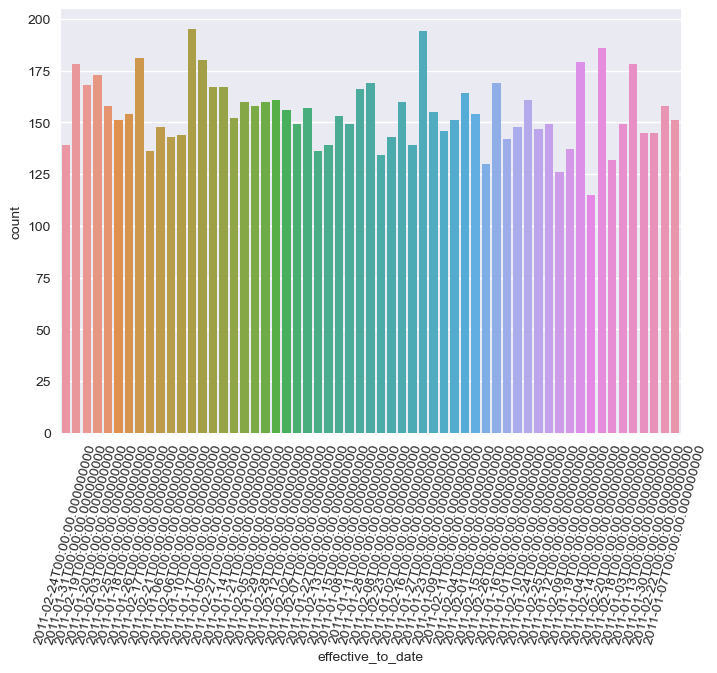

In [110]:
sns.countplot(categorical_df, x=customer_df['effective_to_date'])
plt.xticks(rotation=75)
plt.show() 


- Comments: illegible, but divided into 59 bars (maybe grouped by customer?). There is only one year, and two months; days has more unique values.

In [106]:
# group them by name to count dates
customer_date = customer_df.groupby(['effective_to_date']).agg({'customer':pd.Series.nunique}).reset_index()
customer_date.columns = ['effective_to_date', 'customer_count']
customer_date

,effective_to_date,customer_count
0,2011-01-01,148
1,2011-01-02,160
2,2011-01-03,178
3,2011-01-04,115
4,2011-01-05,167
5,2011-01-06,143
6,2011-01-07,151
7,2011-01-08,149
8,2011-01-09,146
9,2011-01-10,195


5. The time variable can be useful. You shoud transform its data into a more useful form.
    Hint: Day, week, and month as integers might be useful.

In [108]:
# Extract day, week, and month and assion to new columns
customer_df['day'] = customer_df['effective_to_date'].dt.day
customer_df['week'] = customer_df['effective_to_date'].dt.week
customer_df['month'] = customer_df['effective_to_date'].dt.month

customer_df

## alt way - thanks Diego! 
# categorical_df['week_day'] = categorical_df['effective_to_date'].dt.day_name()

/var/folders/nn/t4c1n2z11_g_hd91q77nxzb80000gn/T/ipykernel_77053/579322715.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  customer_df['week'] = customer_df['effective_to_date'].dt.week


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,day,week,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,8,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,31,5,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,7,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,20,3,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,10,6,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,12,6,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,6,5,2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,3,5,2
